<a href="https://colab.research.google.com/github/tanishayadav16/DL_exp3/blob/main/exp23_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 69s 5s/step - accuracy: 0.2726 - loss: 1.2290 - val_accuracy: 0.3600 - val_loss: 1.1845
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step - accuracy: 0.2968 - loss: 1.2925 - val_accuracy: 0.3800 - val_loss: 1.1089
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.3315 - loss: 1.1426 - val_accuracy: 0.3600 - val_loss: 1.1117
Epoch 1/2
13/13 ━━━━━━━━━━━━━━━━━━━━ 75s 6s/step - accuracy: 0.3549 - loss: 1.1465 - val_accuracy: 0.4600 - val_loss: 1.0805
Epoch 2/2
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - accuracy: 0.3336 - loss: 1.1429 - val_accuracy: 0.2600 - val_loss: 1.0943


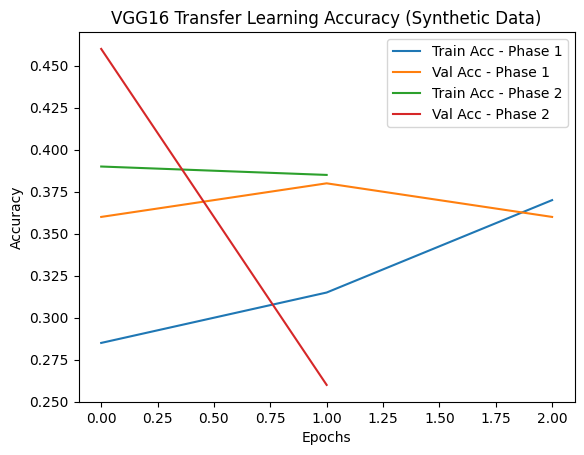

In [2]:
# 1. Imports
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# 2. Parameters
IMG_HEIGHT, IMG_WIDTH = 150, 150
NUM_CLASSES = 3
NUM_TRAIN = 200
NUM_VAL = 50
BATCH_SIZE = 16
EPOCHS_PHASE1 = 3
EPOCHS_PHASE2 = 2

# 3. Generate Synthetic Dataset
def generate_data(num_samples):
    X = np.random.rand(num_samples, IMG_HEIGHT, IMG_WIDTH, 3)
    y = tf.keras.utils.to_categorical(np.random.randint(0, NUM_CLASSES, size=(num_samples,)), num_classes=NUM_CLASSES)
    return X, y

X_train, y_train = generate_data(NUM_TRAIN)
X_val, y_val = generate_data(NUM_VAL)

# 4. Load Pretrained VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
base_model.trainable = False

# 5. Add Custom Layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# 6. Compile & Train (Phase 1)
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCHS_PHASE1, batch_size=BATCH_SIZE)

# 7. Fine-Tune Last Layers
for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history_fine = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCHS_PHASE2, batch_size=BATCH_SIZE)

# 8. Save Model
model.save("vgg16_synthetic_model.h5")

# 9. Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Acc - Phase 1')
plt.plot(history.history['val_accuracy'], label='Val Acc - Phase 1')
plt.plot(history_fine.history['accuracy'], label='Train Acc - Phase 2')
plt.plot(history_fine.history['val_accuracy'], label='Val Acc - Phase 2')
plt.title("VGG16 Transfer Learning Accuracy (Synthetic Data)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
